# Model Fitting for Abalone Age prediction

**As an Age Classifier**

In [ ]:
# import the required libraries

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

#for confusion matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

#for model evaluation
from numpy import mean, std
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
from matplotlib import pyplot

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_abalone.csv to cleaned_abalone (1).csv


In [ ]:
import io

data = pd.read_csv(io.BytesIO(uploaded['cleaned_abalone (1).csv']))
data.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age_Category,Age,weight_diff,Sex2
0,Male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,Old,16.5,0.0385,Non-Infant
1,Male,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,Adult,8.5,0.0075,Non-Infant


In [ ]:
#create dummy variables
df_encoded = pd.get_dummies(data, columns = ['Sex'] ,drop_first=True)

#dummies for ordinary variable
df_encoded['Age_Category'] = df_encoded.Age_Category.map({
    'Young': 0,
    'Adult' : 1,
    'Old' : 2})
#df_encoded.head()

data1=df_encoded

data1.head(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age_Category,Age,weight_diff,Sex2,Sex_Infant,Sex_Male
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,2,16.5,0.0385,Non-Infant,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,1,8.5,0.0075,Non-Infant,0,1


for ridge, lasso enet and KNN models, the data is standardized. but when applied for random forest and gradient boost, the code is run without standardizing the values.

In [ ]:
#standardize data
cols_to_norm = ['Length',	'Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight']
data1[cols_to_norm] = StandardScaler().fit_transform(data1[cols_to_norm])

In [ ]:
#define x, y
x = data1.drop(columns = ['Age_Category','Rings','Age','weight_diff','Sex2'], axis=1)
y = data1.Age_Category

#split train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=1234)

In [ ]:
# shape of the data set
x_train.shape
x_test.shape

(835, 9)

In [ ]:
x_train.columns


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_Infant', 'Sex_Male'],
      dtype='object')

In [ ]:
# the target variable value counts.
y.value_counts()

1    3494
2     490
0     189
Name: Age_Category, dtype: int64

# Categorical Age prediction

##**Logistic Ridge**

In [ ]:
# define models and parameters
model = LogisticRegression(multi_class='multinomial',penalty='l2',random_state=0)
solvers = ['newton-cg', 'lbfgs', 'sag']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.875473 using {'C': 100, 'solver': 'sag'}
0.875073 (0.011339) with: {'C': 100, 'solver': 'newton-cg'}
0.875173 (0.011602) with: {'C': 100, 'solver': 'lbfgs'}
0.875473 (0.010786) with: {'C': 100, 'solver': 'sag'}
0.874873 (0.011565) with: {'C': 10, 'solver': 'newton-cg'}
0.875373 (0.011297) with: {'C': 10, 'solver': 'lbfgs'}
0.875273 (0.011636) with: {'C': 10, 'solver': 'sag'}
0.875273 (0.011612) with: {'C': 1.0, 'solver': 'newton-cg'}
0.875273 (0.011612) with: {'C': 1.0, 'solver': 'lbfgs'}
0.875273 (0.011612) with: {'C': 1.0, 'solver': 'sag'}
0.871979 (0.010327) with: {'C': 0.1, 'solver': 'newton-cg'}
0.871979 (0.010327) with: {'C': 0.1, 'solver': 'lbfgs'}
0.871979 (0.010327) with: {'C': 0.1, 'solver': 'sag'}
0.861390 (0.009118) with: {'C': 0.01, 'solver': 'newton-cg'}
0.861390 (0.009118) with: {'C': 0.01, 'solver': 'lbfgs'}
0.861390 (0.009118) with: {'C': 0.01, 'solver': 'sag'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


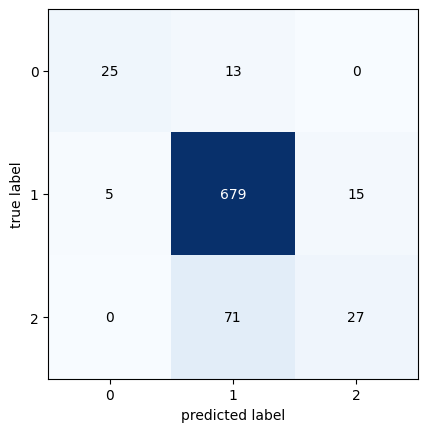

In [ ]:
#using best results
ridge=LogisticRegression(multi_class='multinomial',C=100,penalty='l2',solver='sag',random_state=0)
#fit model
ridge.fit(x_train,y_train)
#get predictions
pred_Y_ridge = ridge.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_target=y_test,
                      y_predicted=pred_Y_ridge,
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
#accuracy values
accuracy_score(y_test, pred_Y_ridge)

0.8754491017964072

In [ ]:
#the classification report
print(classification_report(y_test, pred_Y_ridge))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74        38
           1       0.89      0.97      0.93       699
           2       0.64      0.28      0.39        98

    accuracy                           0.88       835
   macro avg       0.79      0.63      0.68       835
weighted avg       0.86      0.88      0.86       835



##**Logistic Lasso**

In [ ]:
# define models and parameters
model = LogisticRegression(multi_class='multinomial',random_state=0)
solvers = ['saga']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.875971 using {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.875573 (0.011276) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.875373 (0.011407) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.875971 (0.011853) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.872278 (0.009564) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.844915 (0.005240) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


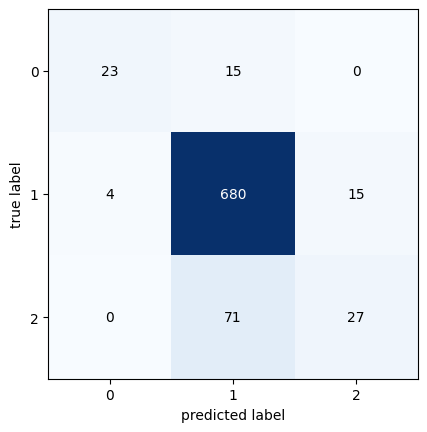

In [ ]:
#using best results
lasso=LogisticRegression(multi_class='multinomial',C=1.0,penalty='l1',solver='saga',random_state=0)
#fit model
lasso.fit(x_train,y_train)
#get predictions
pred_Y_lasso = lasso.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_target=y_test,
                      y_predicted=pred_Y_lasso,
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
#accuracy values
accuracy_score(y_test, pred_Y_lasso)

0.874251497005988

In [ ]:
#the classification report
print(classification_report(y_test, pred_Y_lasso))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        38
           1       0.89      0.97      0.93       699
           2       0.64      0.28      0.39        98

    accuracy                           0.87       835
   macro avg       0.79      0.62      0.67       835
weighted avg       0.86      0.87      0.85       835




##**Elastic Net**

In [ ]:
# define models and parameters
model = LogisticRegression(multi_class='multinomial',solver='saga',penalty='elasticnet',random_state=0)
l1ratio =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(C=c_values,l1_ratio=l1ratio)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.875871 using {'C': 1.0, 'l1_ratio': 0.9}
0.875573 (0.011276) with: {'C': 100, 'l1_ratio': 0.1}
0.875573 (0.011276) with: {'C': 100, 'l1_ratio': 0.2}
0.875573 (0.011276) with: {'C': 100, 'l1_ratio': 0.3}
0.875573 (0.011276) with: {'C': 100, 'l1_ratio': 0.4}
0.875573 (0.011276) with: {'C': 100, 'l1_ratio': 0.5}
0.875573 (0.011276) with: {'C': 100, 'l1_ratio': 0.6}
0.875573 (0.011276) with: {'C': 100, 'l1_ratio': 0.7}
0.875573 (0.011276) with: {'C': 100, 'l1_ratio': 0.8}
0.875573 (0.011276) with: {'C': 100, 'l1_ratio': 0.9}
0.875472 (0.011694) with: {'C': 10, 'l1_ratio': 0.1}
0.875472 (0.011745) with: {'C': 10, 'l1_ratio': 0.2}
0.875472 (0.011488) with: {'C': 10, 'l1_ratio': 0.3}
0.875572 (0.011594) with: {'C': 10, 'l1_ratio': 0.4}
0.875373 (0.011407) with: {'C': 10, 'l1_ratio': 0.5}
0.875373 (0.011407) with: {'C': 10, 'l1_ratio': 0.6}
0.875373 (0.011407) with: {'C': 10, 'l1_ratio': 0.7}
0.875373 (0.011407) with: {'C': 10, 'l1_ratio': 0.8}
0.875373 (0.011407) with: {'C': 10, 'l1_r

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


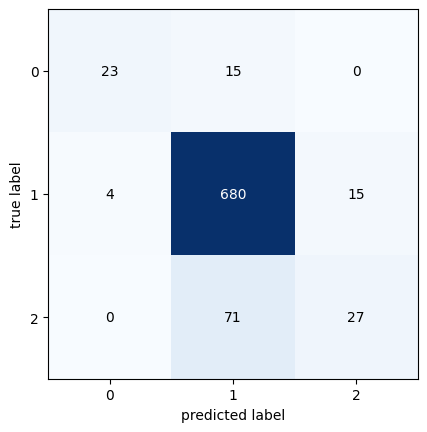

In [ ]:
#using best results
enet=LogisticRegression(multi_class='multinomial',C=1.0,penalty='elasticnet',solver='saga',l1_ratio=0.9,random_state=0)
#fit model
enet.fit(x_train,y_train)
#get predictions
pred_Y_enet = enet.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_target=y_test,
                      y_predicted=pred_Y_enet,
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
#accuracy values
accuracy_score(y_test, pred_Y_enet)

0.874251497005988

In [ ]:
#the classification report
print(classification_report(y_test, pred_Y_enet))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        38
           1       0.89      0.97      0.93       699
           2       0.64      0.28      0.39        98

    accuracy                           0.87       835
   macro avg       0.79      0.62      0.67       835
weighted avg       0.86      0.87      0.85       835



##**KNN**

In [ ]:
# define models and parameters
np.random.seed(0)
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.866285 using {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
0.826638 (0.018716) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.826638 (0.018716) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.852004 (0.013222) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.852304 (0.013593) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.857695 (0.013573) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.858594 (0.012645) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.862190 (0.011966) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.862889 (0.012548) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.866185 (0.012138) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.865388 (0.012902) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.864887 (

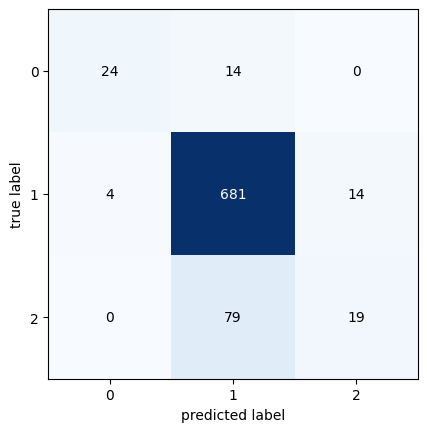

In [ ]:
#using best results
np.random.seed(0)
KNN_model = KNeighborsClassifier(n_neighbors=9,weights='uniform',metric='manhattan')
#fit model
KNN_model.fit(x_train,y_train)
#get predictions
pred_Y_knn = KNN_model.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_target=y_test,
                      y_predicted=pred_Y_knn,
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
#accuracy values
accuracy_score(y_test, pred_Y_knn)

0.8670658682634731

In [ ]:
print(classification_report(y_test, pred_Y_knn))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        38
           1       0.88      0.97      0.92       699
           2       0.58      0.19      0.29        98

    accuracy                           0.87       835
   macro avg       0.77      0.60      0.65       835
weighted avg       0.84      0.87      0.84       835



## **Random Forest**

In [ ]:
# define models and parameters
model = RandomForestClassifier(random_state = 42)
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.871979 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.863790 (0.011681) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.871079 (0.011418) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.871979 (0.012060) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.863790 (0.011681) with: {'max_features': 'log2', 'n_estimators': 10}
0.871079 (0.011418) with: {'max_features': 'log2', 'n_estimators': 100}
0.871979 (0.012060) with: {'max_features': 'log2', 'n_estimators': 1000}


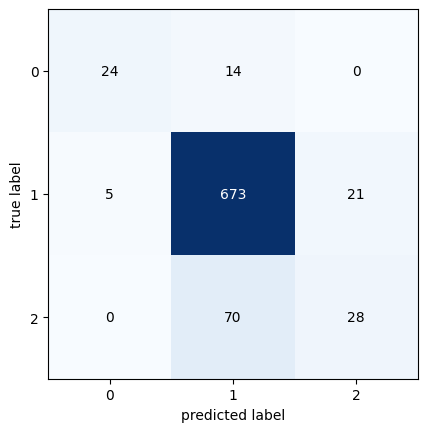

In [ ]:
#using best results
rf=RandomForestClassifier(n_estimators=1000,max_features='sqrt',random_state = 42)

#fit model
rf.fit(x_train,y_train)
#get predictions
pred_Y_rf = rf.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_target=y_test,
                      y_predicted=pred_Y_rf,
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
#accuracy values
accuracy_score(y_test, pred_Y_rf)

0.8682634730538922

In [ ]:
print(classification_report(y_test, pred_Y_rf))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        38
           1       0.89      0.96      0.92       699
           2       0.57      0.29      0.38        98

    accuracy                           0.87       835
   macro avg       0.76      0.63      0.67       835
weighted avg       0.85      0.87      0.85       835



## **Gradient Boosting**

In [ ]:
# define models and parameters
model = GradientBoostingClassifier(random_state=0)
n_estimators = [10, 100, 200]
learning_rate = [0.001, 0.01]
subsample = [0.5, 0.7]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.868781 using {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.5}
0.837328 (0.001321) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.837328 (0.001321) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.837328 (0.001321) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.837328 (0.001321) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.837328 (0.001321) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
0.837328 (0.001321) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
0.837328 (0.001321) with: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 10, 'subsample': 0.5}
0.837328 (0.001321) with: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 10, 'subsample': 0.7}
0.837328 (0.001321) with: {'learning_rate': 0.001, 'max_

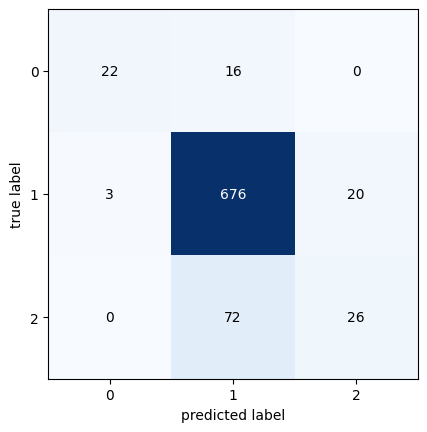

In [ ]:
#using best parameters
gradient_model = GradientBoostingClassifier(learning_rate=0.01 , max_depth=7, n_estimators=200, subsample=0.5,random_state=0)
#fit model
gradient_model.fit(x_train,y_train)

#get predictions
pred_Y_gb = gradient_model.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_target=y_test,
                      y_predicted=pred_Y_gb,
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
#accuracy values
accuracy_score(y_test, pred_Y_gb)

0.8670658682634731

In [ ]:
#the classification report
print(classification_report(y_test, pred_Y_gb))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        38
           1       0.88      0.97      0.92       699
           2       0.57      0.27      0.36        98

    accuracy                           0.87       835
   macro avg       0.78      0.60      0.66       835
weighted avg       0.85      0.87      0.85       835



The Logistic Ridge model can be selected as the best model as it has the highest f1 score of 0.86 compared to other models. The model accuracy is 87.54
* But the target variable is imbalanced
( The best way to overcome this problem is to use Sampling techniques, as mentioned in the article “Handling Imbalanced Dataset.” In the Journal published by International Transaction on Computer science and Engineering). Hence sampling techniques were applied
for the tuned models.

## Applying Sampling methods

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

### SOMTE Sampling

In [ ]:
#using SOMTE sampler
oversample=SMOTE()
# resampling x_train, y_train
x_trainS, y_trainS = oversample.fit_resample(x_train, y_train)

# new class distribution
print(f"Training with over target statistics: {Counter(y_trainS)}")
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training with over target statistics: Counter({1: 2795, 0: 2795, 2: 2795})
Training target statistics: Counter({1: 2795, 2: 392, 0: 151})
Testing target statistics: Counter({1: 699, 2: 98, 0: 38})


In [ ]:
#Smote sampling for logistic elastic net
ridgeS=LogisticRegression(multi_class='multinomial',C=100,penalty='l2',solver='sag',random_state=0)
#fit model
ridgeS.fit(x_trainS,y_trainS)
#get predictions
pred_Y_ridgeS = ridgeS.predict(x_test)
#accuracy values
accuracy_score(y_test, pred_Y_ridgeS)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7724550898203593

### Oversampling

In [ ]:
# random oversampler
ros = RandomOverSampler()
# resampling x_train, y_train
x_trainO, y_trainO = ros.fit_resample(x_train, y_train)

# new class distribution
print(f"After Oversampling statistics: {Counter(y_trainO)}")
print(f"Before Oversampling statistics: {Counter(y_train)}")

After Oversampling statistics: Counter({1: 2795, 0: 2795, 2: 2795})
Before Oversampling statistics: Counter({1: 2795, 2: 392, 0: 151})


In [ ]:
# applying over sampler for logistic elastic net
ridgeO=LogisticRegression(multi_class='multinomial',C=100,penalty='l2',solver='sag',random_state=0)
#fit model
ridgeO.fit(x_trainO,y_trainO)
#get predictions
pred_Y_ridgeO = ridgeO.predict(x_test)
#accuracy values
accuracy_score(y_test, pred_Y_ridgeO)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7688622754491018

Application of sampling techniques did not improve the accuracies of the predicions hence sampling technique is discarded.

As the accuracies were only 76%-77%

# Numerical Age Prediction: Regression

In [ ]:
# split train and test sets again since the target variable is now Age = 1.5+Rings

#define x, y
x1 = data1.drop(columns = ['Age_Category','Rings','Age','weight_diff','Sex2'], axis=1)
y1 = data1.Age

#split train and test sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8, random_state=1234)

In [ ]:
#required models

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error

## models that require scaling

In [ ]:
# prepare configuration for cross validation test harness
np.random.seed(0)
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ENET', ElasticNet()))
models.append(('KNN', KNeighborsRegressor(n_neighbors = 4)))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'

for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, x1_train, y1_train, cv=kfold, scoring=scoring)

  # Calculate R-squared and RMSE
  y1_pred = model_selection.cross_val_predict(model, x1_test, y1_test,cv=kfold)
  r2 = r2_score(y1_test, y1_pred)
  rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))

  results.append(cv_results)
  names.append(name)

  # Print results
  msg = "%s: R-squared = %f, RMSE = %f" % (name, r2, rmse)
  print(msg)

LR: R-squared = 0.521138, RMSE = 2.222479
Ridge: R-squared = 0.522925, RMSE = 2.218328
Lasso: R-squared = 0.278040, RMSE = 2.728909
ENET: R-squared = 0.326407, RMSE = 2.635915
KNN: R-squared = 0.464200, RMSE = 2.350898


## models that do not require scaling

In [ ]:
# prepare configuration for cross validation test harness
np.random.seed(0)

models.append(('CART', DecisionTreeRegressor()))
models.append(('RF',RandomForestRegressor()))
models.append(('GBR',GradientBoostingRegressor()))

# evaluate each model in turn
scoring = 'neg_mean_squared_error'

for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, x1_train, y1_train, cv=kfold, scoring=scoring)

  # Calculate R-squared and RMSE
  y1_pred = model_selection.cross_val_predict(model, x1_test, y1_test, cv=kfold)
  r2 = r2_score(y1_test, y1_pred)
  rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))

  results.append(cv_results)
  names.append(name)

  # Print results
  msg = "%s: R-squared = %f, RMSE = %f" % (name, r2, rmse)
  print(msg)

LR: R-squared = 0.521138, RMSE = 2.222479
Ridge: R-squared = 0.509073, RMSE = 2.250304
Lasso: R-squared = -0.001456, RMSE = 3.214019
ENET: R-squared = 0.077800, RMSE = 3.084219
KNN: R-squared = 0.465136, RMSE = 2.348844
CART: R-squared = 0.202479, RMSE = 2.868161
RF: R-squared = 0.536463, RMSE = 2.186626
GBR: R-squared = 0.532470, RMSE = 2.196024


from the above the highest R square and the minimum RMSE is foe the random forest Regressor, hence parameter tuning is conducted to furthur fine tune the model.

In [ ]:
#Tuning the best model-RF with lowest rmse
np.random.seed(0)
param_grid = dict(n_estimators=np.array([10,100,200,300,400]),max_features=np.array(['sqrt','log2']))
model = RandomForestRegressor(random_state=42)
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(x1_train, y1_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-5.121266 (0.654144) with: {'max_features': 'sqrt', 'n_estimators': 10}
-4.682930 (0.611517) with: {'max_features': 'sqrt', 'n_estimators': 100}
-4.678336 (0.587801) with: {'max_features': 'sqrt', 'n_estimators': 200}
-4.659522 (0.602154) with: {'max_features': 'sqrt', 'n_estimators': 300}
-4.660582 (0.601198) with: {'max_features': 'sqrt', 'n_estimators': 400}
-5.121266 (0.654144) with: {'max_features': 'log2', 'n_estimators': 10}
-4.682930 (0.611517) with: {'max_features': 'log2', 'n_estimators': 100}
-4.678336 (0.587801) with: {'max_features': 'log2', 'n_estimators': 200}
-4.659522 (0.602154) with: {'max_features': 'log2', 'n_estimators': 300}
-4.660582 (0.601198) with: {'max_features': 'log2', 'n_estimators': 400}
Best: -4.659522 using {'max_features': 'sqrt', 'n_estimators': 300}


In [ ]:
np.random.seed(0)
#fitting the best model using best parameters
model = RandomForestRegressor(max_features= 'sqrt',n_estimators= 300)
model.fit(x1_train, y1_train)

#get prediction
y1_pred = model.predict(x1_test)

# Calculate R-squared and RMSE
r2 = r2_score(y1_test, y1_pred)
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))


In [ ]:
#compare the values predicted and original
compare = pd.DataFrame({'Prediction': y1_pred, 'Test Data' : y1_test})
compare.head(10)

,Prediction,Test Data
3802,9.623333,10.5
1197,12.103333,13.5
3269,11.650000,12.5
2459,10.543333,9.5
1176,12.986667,11.5
548,11.550000,13.5
1394,14.713333,11.5
2705,12.610000,12.5
3390,14.526667,11.5
1289,9.723333,8.5


from the above outputs it seems as if the model is properly predicitng the  outputs. the perfotmance is good.hence this model is used for the data product

In [ ]:
x1_train.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_Infant', 'Sex_Male'],
      dtype='object')

## Save the models

In [ ]:
import pickle

In [ ]:
# saving the regression file
filename ='random_forest_regressor.sav'
pickle.dump(model,open(filename,'wb')) # writing in binary format

In [ ]:
# saving the classifier file
filename ='ridge_classifier.sav'
pickle.dump(ridge,open(filename,'wb'))

In [ ]:
# loading the model
loaded_model_ridge= pickle.load(open('ridge_classifier.sav','rb')) #reading the binary form

In [ ]:
input_data = (0.455,	0.365,	0.095,	0.5140,	0.2245,	0.1010,0.15,0,1)
input_data_as_numpy_array = np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)


prediction =loaded_model_ridge.predict(input_data_reshaped)
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
if (prediction[0] == 0):
  print('the abalone age is Young')
elif (prediction[0] == 1):
  print("the abalone age is Adult")
else:
  print("the abalone age is Old")

the abalone age is Adult
